<a href="https://colab.research.google.com/github/Nicolaspm2/study_btc/blob/main/Study_BTC/USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudos BTC

### Estudo de caso do BTC-USD


In [1]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 38.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import yfinance as yf
import sweetviz as sv
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go

In [3]:
btc_close = yf.download('BTC-USD', period = 'max')['Adj Close']
btc_close


[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-09-09,57019.535156
2024-09-10,57648.710938
2024-09-11,57343.171875


### Primeiro vamos fazer um histograma com os dados de fechamento diario

In [4]:
fig01 = make_subplots(rows = 1, cols = 2)

fig01.add_trace(go.Histogram(x=btc_close),row=1,col=1)
fig01.add_vline(x=np.mean(btc_close), line_width=3, line_color='red', row=1, col=1)
fig01.add_vline(x=np.median(btc_close), line_width=3,line_dash='dash', line_color='green', row=1, col=1)


fig01.add_trace(go.Box(y=btc_close, boxpoints='all', boxmean='sd'), row=1,col=2)

### O preço não possui uma distribuição normal
- por isso utilizamos o retorno, e nao o preço

In [5]:
import plotly.express as px

In [6]:
btc = yf.download('BTC-USD', period = 'max')['Close']


[*********************100%***********************]  1 of 1 completed


In [7]:
fig02 = px.histogram(btc, color_discrete_sequence=['lightseagreen'])

fig02.add_vline(x=np.mean(btc), line_width=3, line_color='red')
fig02.add_vline(x=np.median(btc), line_width=3, line_dash='dash', line_color='red')

fig02.update_layout(width=800, height=800, template='simple_white', paper_bgcolor='#f7f8fa', margin=dict(l=20,r=20,t=20,b=20), showlegend=False)

### QQPLOT

In [8]:
from scipy import stats
import pylab

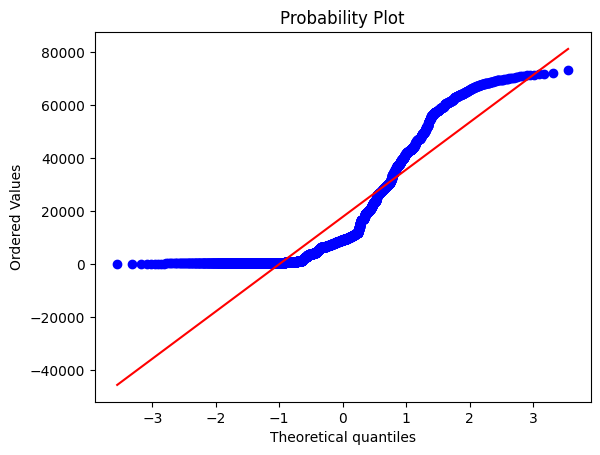

In [9]:
stats.probplot(btc, dist='norm', plot=pylab)
pylab.show()

Por isso que no mercado financeiro fazemos analise com os retornos e não os preços, pois os preço podem acabar violando premissas estatisticas

Agora vamos modelar os dados do retorno


### Modelando com os retornos

In [10]:
retornos_btc = btc.pct_change()

In [11]:
retornos_btc.dropna(inplace=True)

In [12]:
fig02 = px.histogram(retornos_btc, color_discrete_sequence=['lightseagreen'])

fig02.add_vline(x=np.mean(retornos_btc), line_width=3, line_color='red')
fig02.add_vline(x=np.median(retornos_btc), line_width=3, line_dash='dash', line_color='red')

fig02.update_layout(width=800, height=800, template='simple_white', paper_bgcolor='#f7f8fa', margin=dict(l=20,r=20,t=20,b=20), showlegend=False)

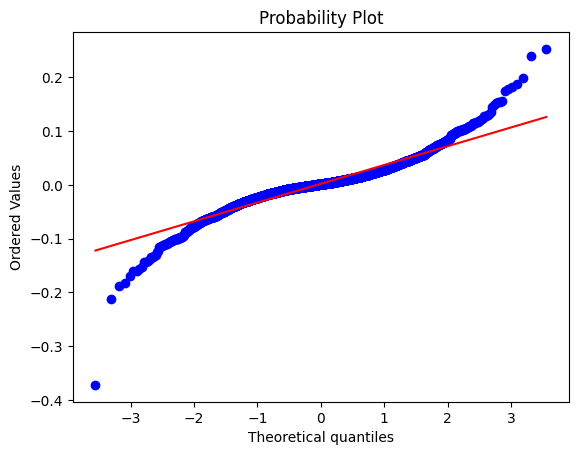

In [13]:
stats.probplot(retornos_btc, dist='norm', plot=pylab)
pylab.show()

In [14]:

stats.kurtosis(retornos_btc, fisher = True)

7.502923533607971

In [15]:
stats.skew(retornos_btc)

-0.11904197110330335

Aqui temos uma assimetria negativa = retornos diarios normalmente maiores

### Media movel preço BTC

In [16]:
btc = btc.to_frame()

In [17]:
btc['MM20'] = btc['Close'].rolling(20).mean()
btc['MM200'] = btc['Close'].rolling(200).mean()

In [18]:
btc = btc.dropna()

In [19]:
btc

,Close,MM20,MM200
Date,,,
2015-04-04,253.697006,256.635451,310.843170
2015-04-05,260.597992,255.135701,309.859490
2015-04-06,255.492004,253.635051,309.014750
2015-04-07,253.179993,253.479100,308.306670
2015-04-08,245.022003,252.683800,307.487260
...,...,...,...
2024-09-09,57019.535156,59050.226562,63886.412852
2024-09-10,57648.710938,58873.902539,63920.996660
2024-09-11,57343.171875,58721.965430,63949.857012


<Axes: xlabel='Date'>

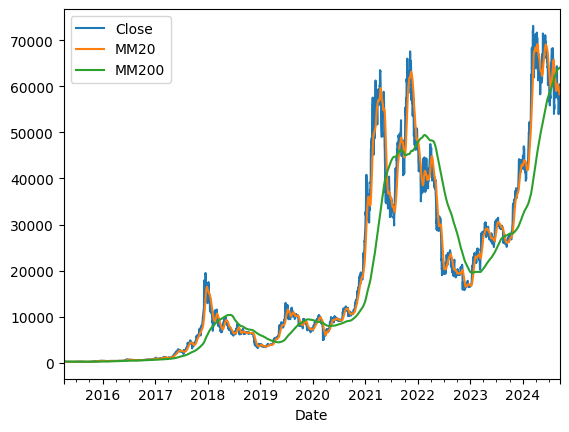

In [20]:
btc.plot()

In [21]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=btc.index, y=btc.Close, name='Cotação BTC-USD'))
fig.add_trace(go.Scatter(x=btc.index, y=btc.MM20, name= 'Média Móvel 20P'))
fig.add_trace(go.Scatter(x=btc.index, y=btc.MM200,name= 'Média Móvel 200P'))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120,r=20,t=20,b=20),
                  template='simple_white', paper_bgcolor='#f7f8fa', width=800, height=400)

fig.show()

### Criando Boilinger bands
- Z-Score

In [22]:
btc['IC_95_mm_lower'] = btc['Close'].rolling(window=20).mean() - 1.96*btc['Close'].rolling(window=20).std()
btc['IC_95_mm_upper'] = btc['Close'].rolling(window=20).mean() + 1.96*btc['Close'].rolling(window=20).std()

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=btc.index, y=btc.Close, name='Cotação BTC-USD'))
fig.add_trace(go.Scatter(x=btc.index, y=btc.MM20, name= 'Média Móvel 20P'))
fig.add_trace(go.Scatter(x=btc.index, y=btc.IC_95_mm_upper,name= 'Banda Superior IC95'))
fig.add_trace(go.Scatter(x=btc.index, y=btc.IC_95_mm_lower,name= 'Banda Inferior IC95'))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120,r=20,t=20,b=20),
                  template='simple_white', paper_bgcolor='#f7f8fa', width=800, height=400)

fig.show()

###  Outras Distribuições Importantes



#### - Distribuição de Poisson

- Variavel discreta ou continua
  - Quanto temos numeros inteiros como quantidade de trades no dia utilizamos a distribuição de poisson

#### Distribuição Log Normal
- O logaritmo da sua variavel segue uma normal

#### Distribuição logistica ou binomial


### Biblioteca SweetViz

In [24]:
visual = sv.analyze(btc)

                                             |          | [  0%]   00:00 -> (? left)

In [25]:
visual.show_html('Relatorio_BTC')

Report Relatorio_BTC was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Transformação Logaritmica


In [26]:
#### Gráfico Modelo sem a transformação logaritmica

In [27]:
ibov_sp500 = yf.download(['^BVSP','^GSPC'], period='max')['Close']

[*********************100%***********************]  2 of 2 completed


In [28]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=ibov_sp500.index, y=ibov_sp500['^GSPC'],
                         name='S&P 500', line=dict(color='blue', width=3)))

fig.add_vrect(x0='1973', x1='1985', fillcolor="#000000", opacity=0.25, line_width=0)
fig.add_trace(go.Scatter(x=['1979'],y=[1800],mode="text",text="<b>Petróleo e",textposition="top center",showlegend=False))
fig.add_trace(go.Scatter(x=['1979'],y=[1500],mode="text",text="<b>Energia",textposition="top center",showlegend=False))

fig.add_vrect(x0='2000-06', x1='2003-06', fillcolor="blue", opacity=0.25, line_width=0)
fig.add_trace(go.Scatter(x=['2002-06'],y=[3000],mode="text",text="<b>Bolha da",textposition="top center",showlegend=False))
fig.add_trace(go.Scatter(x=['2002-06'],y=[2700],mode="text",text="<b>Internet",textposition="top center",showlegend=False))

fig.add_vrect(x0='2008', x1='2013', fillcolor="green", opacity=0.25, line_width=0)
fig.add_trace(go.Scatter(x=['2010-06'],y=[4000],mode="text",text="<b>Crise",textposition="top center",showlegend=False))
fig.add_trace(go.Scatter(x=['2010-06'],y=[3700],mode="text",text="<b>Subprimes",textposition="top center",showlegend=False))

fig.add_vrect(x0='2020', x1='2021', fillcolor="red", opacity=0.25, line_width=0)
fig.add_trace(go.Scatter(x=['2021'],y=[4000],mode="text",text="<b>COVID-19",textposition="top center",showlegend=False))

fig.update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b>Valor nominal (USD)", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=20,color="black"),paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  width=1000,height=500,legend=dict(orientation="h",yanchor="bottom",y=0.9,xanchor="right",x=0.15),
                  xaxis=dict(range=['1950', '2025']))

fig.show()

In [29]:
### Grafico com a transformação logaritmica, facilita a visualização

fig = go.Figure()

fig.add_trace(go.Scatter(x=ibov_sp500.index, y=np.log(ibov_sp500['^GSPC']),
                         name='S&P 500', line=dict(color='blue', width=3)))

fig.add_vrect(x0='1973', x1='1985', fillcolor="#000000", opacity=0.25, line_width=0)
fig.add_trace(go.Scatter(x=['1979'],y=np.log([1800]),mode="text",text="<b>Petróleo e",textposition="top center",showlegend=False))
fig.add_trace(go.Scatter(x=['1979'],y=np.log([1100]),mode="text",text="<b>Energia",textposition="top center",showlegend=False))

fig.add_vrect(x0='2000-06', x1='2003-06', fillcolor="blue", opacity=0.25, line_width=0)
fig.add_trace(go.Scatter(x=['2002-06'],y=np.log([3000]),mode="text",text="<b>Bolha da",textposition="top center",showlegend=False))
fig.add_trace(go.Scatter(x=['2002-06'],y=np.log([2100]),mode="text",text="<b>Internet",textposition="top center",showlegend=False))

fig.add_vrect(x0='2008', x1='2013', fillcolor="green", opacity=0.25, line_width=0)
fig.add_trace(go.Scatter(x=['2010-06'],y=np.log([4000]),mode="text",text="<b>Crise",textposition="top center",showlegend=False))
fig.add_trace(go.Scatter(x=['2010-06'],y=np.log([3100]),mode="text",text="<b>Subprimes",textposition="top center",showlegend=False))

fig.add_vrect(x0='2020', x1='2021', fillcolor="red", opacity=0.25, line_width=0)
fig.add_trace(go.Scatter(x=['2021'],y=np.log([4000]),mode="text",text="<b>COVID-19",textposition="top center",showlegend=False))

fig.update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b>Valor nominal (USD)", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=20,color="black"),paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  width=1000,height=500,legend=dict(orientation="h",yanchor="bottom",y=0.9,xanchor="right",x=0.15),
                  xaxis=dict(range=['1950', '2025']))

fig.show()

Para aprender mais:

* https://www.educamaisbrasil.com.br/enem/matematica/logaritmo

* https://www.infoescola.com/matematica/logaritmo-natural/

In [30]:
print(np.log(1))
print(np.log(10))
print(np.log(100))
print(np.log(1000))

0.0
2.302585092994046
4.605170185988092
6.907755278982137
